In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100.0%

Extracting C:\Users\Jitesh/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Jitesh/.pytorch/F_MNIST_data/FashionMNIST\raw


111.0%

Extracting C:\Users\Jitesh/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Jitesh/.pytorch/F_MNIST_data/FashionMNIST\raw


100.0%

Extracting C:\Users\Jitesh/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Jitesh/.pytorch/F_MNIST_data/FashionMNIST\raw


159.1%..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting C:\Users\Jitesh/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Jitesh/.pytorch/F_MNIST_data/FashionMNIST\raw
Processing...
Done!


In [4]:

image, label = next(iter(trainloader))


In [7]:
import torch.nn as nn

model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10), nn.LogSoftmax(dim = 1))

from torch import optim

optimiser = optim.SGD(model.parameters(), lr = 0.01)

In [27]:
criterion = nn.NLLLoss()

epochs = 2

training_loss = 0
for i in range(epochs):
    training_loss = 0
    for image, label in trainloader:
        image = image.view(64, -1)
        if image.shape[1] != 784:
            print('concern')
            continue
        optimiser.zero_grad()
        output = model.forward(image)
        loss = criterion(output, label)
        training_loss += loss.item()
        loss.backward()
        optimiser.step()
    print(training_loss / len(trainloader))

concern
0.3427037294866688
concern
0.3351615541842955


In [23]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

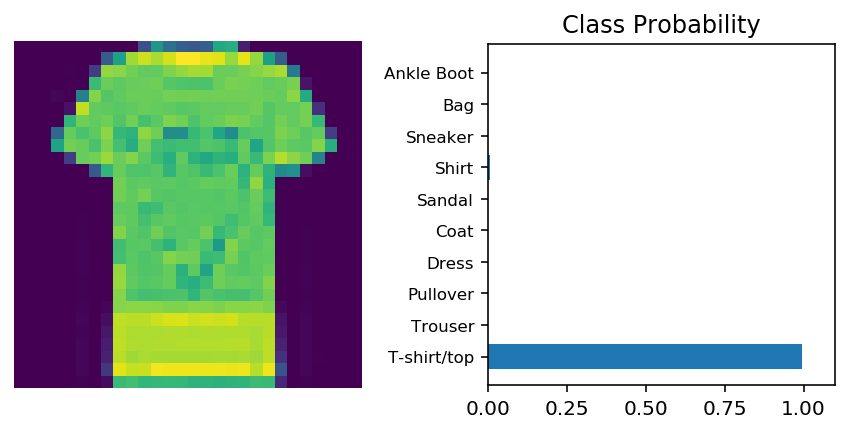

In [26]:
%config InlineBackend.figure_format = 'retina'

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
# TODO: Calculate the class probabilities (softmax) for img
# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')